In [ ]:
import pandas as pd
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [ ]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


[6] This is a frog


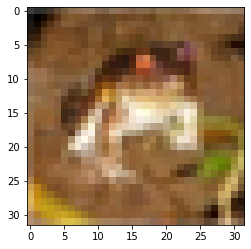

In [ ]:
plt.imshow(xtrain[0])
print(str(ytrain[0])+" This is a frog")

In [ ]:
ytrain

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
print(xtrain.max())
print(xtrain.min())
print(xtest.max())
print(xtest.min())

255
0
255
0


# Scaling my data

In [ ]:
xtrain=xtrain/255
xtest=xtest/255

# Converting label to categorical

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
ytrain_cat=to_categorical(ytrain,10)
ytest_cat=to_categorical(ytest,10)

# Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,MaxPool2D,Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
ec=EarlyStopping(patience=1)

In [ ]:
from tensorflow.python.keras.layers.pooling import Pooling2D
model= Sequential()

#Convolutional layer
model.add(Conv2D(kernel_size=(4,4),filters=32,input_shape=(32,32,3),activation="relu"))
#Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#Convolutional layer
model.add(Conv2D(kernel_size=(4,4),filters=64,input_shape=(32,32,3),activation="relu"))
#Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#Flattening
model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 256)               4

In [ ]:
model.fit(xtrain,ytrain_cat,validation_data=(xtest,ytest_cat),epochs=32,callbacks=[ec])

Epoch 1/32
1563/1563 [==============================] - 18s 6ms/step - loss: 1.4281 - accuracy: 0.4845 - val_loss: 1.2921 - val_accuracy: 0.5348
Epoch 2/32
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0976 - accuracy: 0.6154 - val_loss: 1.1254 - val_accuracy: 0.6099
Epoch 3/32
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9304 - accuracy: 0.6761 - val_loss: 0.9555 - val_accuracy: 0.6697
Epoch 4/32
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8123 - accuracy: 0.7159 - val_loss: 0.9357 - val_accuracy: 0.6776
Epoch 5/32
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7109 - accuracy: 0.7523 - val_loss: 0.9076 - val_accuracy: 0.6903
Epoch 6/32
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6155 - accuracy: 0.7838 - val_loss: 0.9357 - val_accuracy: 0.6932


In [ ]:
loss_model=pd.DataFrame(model.history.history)

In [ ]:
loss_model

,loss,accuracy,val_loss,val_accuracy
0,1.428064,0.48446,1.292067,0.5348
1,1.097635,0.61542,1.125412,0.6099
2,0.930390,0.67610,0.955515,0.6697
3,0.812337,0.71588,0.935697,0.6776
4,0.710903,0.75232,0.907605,0.6903
5,0.615500,0.78376,0.935703,0.6932


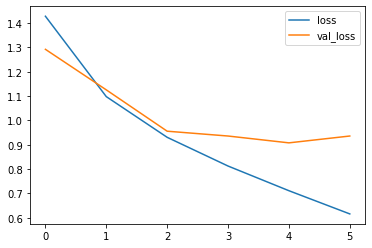

In [ ]:
loss_model[["loss","val_loss"]].plot()

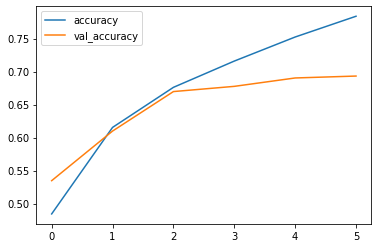

In [ ]:
loss_model[["accuracy","val_accuracy"]].plot()

In [ ]:
model.evaluate(xtest,ytest_cat,verbose=1)

313/313 [==============================] - 1s 5ms/step - loss: 0.9357 - accuracy: 0.6932


[0.9357030391693115, 0.6931999921798706]

**model Prediction**

In [ ]:
model_predictions = (model.predict(xtest) > 0.5).astype("int32")

# Evaluating model

In [ ]:
from sklearn import metrics

In [ ]:
print("classification_report:")
print(metrics.classification_report(model_predictions,ytest_cat))

classification_report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       914
           1       0.75      0.87      0.80       863
           2       0.48      0.70      0.57       691
           3       0.39      0.62      0.48       636
           4       0.50      0.74      0.60       682
           5       0.47      0.70      0.57       676
           6       0.66      0.83      0.73       801
           7       0.72      0.77      0.75       944
           8       0.79      0.82      0.81       967
           9       0.69      0.87      0.77       788

   micro avg       0.62      0.78      0.69      7962
   macro avg       0.62      0.77      0.68      7962
weighted avg       0.64      0.78      0.70      7962
 samples avg       0.62      0.62      0.62      7962



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
